# Imports

In [14]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from src.utils import filter_audio, write_audio, normalize_samples

# Help Functions

In [15]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

In [16]:
def plot_with_zoom(time_indexes, curve, frequency_example = None):
    # Create two subplots, side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the full sine wave on the left subplot
    if frequency_example is not None:
        ax1.set_title(f'A {frequency_example} hertz sine wave')
    else:
        ax1.set_title(f'A sine wave')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Amplitude')
    ax1.plot(time_indexes, curve)

    # Plot the zoomed-in version on the right subplot
    x_axis_max_lim_example = 0.5
    ax2.set_title(f'Zoomed-in Sine Wave (0 to {x_axis_max_lim_example} seconds)')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Amplitude')
    ax2.plot(time_indexes, curve)

    # Set the limits of the x-axis for the right subplot to zoom in
    ax2.set_xlim(0, x_axis_max_lim_example)

    # Show the plot
    plt.tight_layout()  # To prevent overlapping of titles and labels
    plt.grid(True)
    plt.show()


# Fourier Domain

In [17]:
# Generate one sine wave
sample_rate_for_example = 44100  # Sample rate in samples per second
duration_for_example = 5   # Duration of the sine wave in seconds

# Generate a frequency_example hertz sine wave that lasts for 5 seconds
frequency_example = 20
time_indexes, sine_20 = generate_sine_wave(frequency_example, sample_rate_for_example, duration_for_example)  # 440 Hertz is A (Lá)


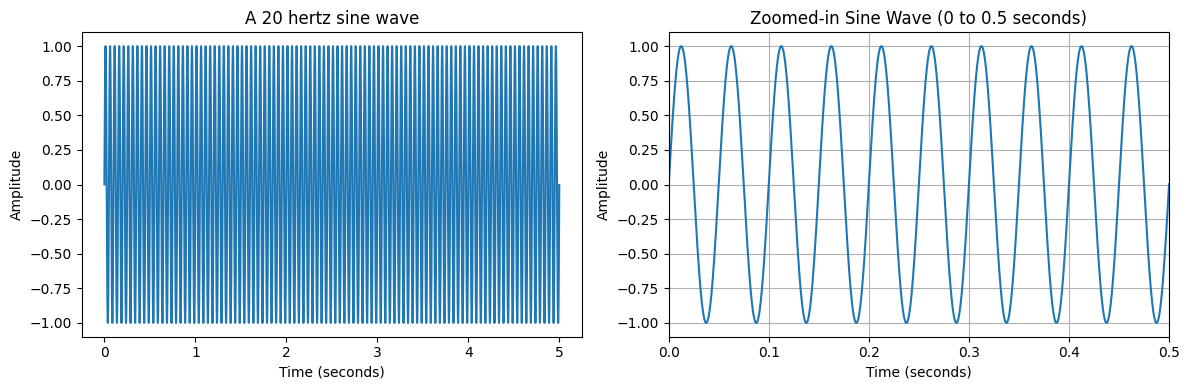

In [18]:
plot_with_zoom(time_indexes, sine_20,frequency_example)

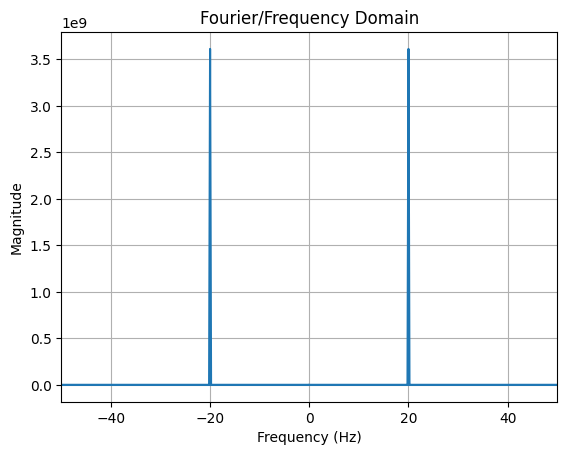

In [19]:
from src.utils import normalize_samples, get_fft_transform, plot_audio_in_frequency
normalized_audio = normalize_samples(sine_20)
yf_toy, xf_toy = get_fft_transform(normalized_audio, sample_rate_for_example, duration_for_example)
plot_audio_in_frequency(xf_toy, yf_toy,[-50,50])

# Notch Filter 
_Filtro Rejeita Faixa (ou Banda)_

## More Waves!

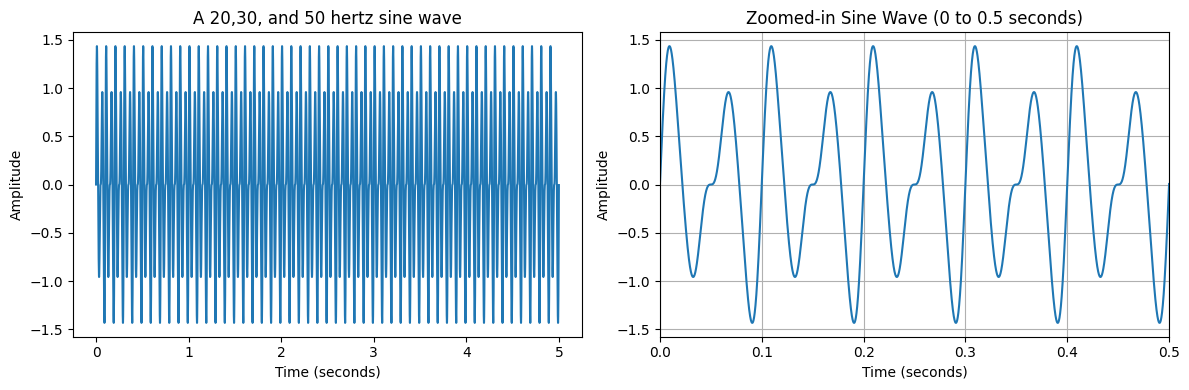

In [25]:
# Generate a frequency_example hertz sine wave that lasts for 5 seconds
_, sine_30 = generate_sine_wave(30, sample_rate_for_example, duration_for_example)  # 440 Hertz is A (Lá)
_, sine_50 = generate_sine_wave(50, sample_rate_for_example, duration_for_example)  

composite_sine = sine_20 + 0.5*sine_30 + 0.1*sine_50
plot_with_zoom(time_indexes, composite_sine, '20,30, and 50')

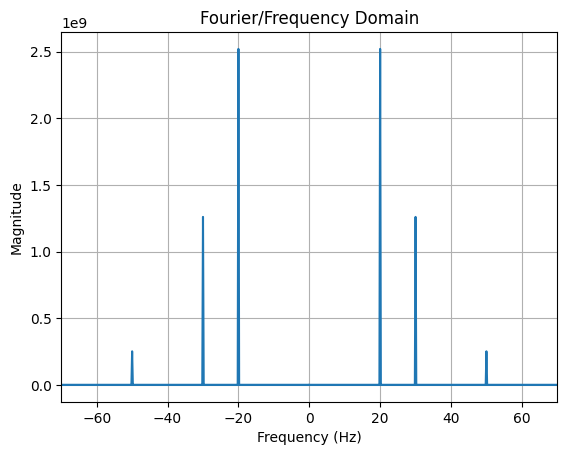

In [21]:
normalized_composite = normalize_samples(composite_sine)
yf_composite, xf_composite = get_fft_transform(normalized_composite, sample_rate_for_example, duration_for_example)
plot_audio_in_frequency(xf_composite, yf_composite,[-70,70])

## Filtering out...

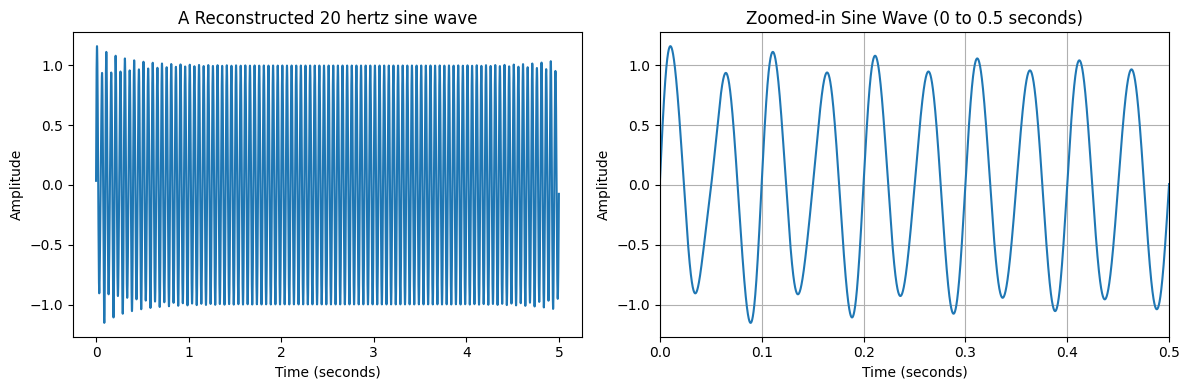

In [22]:
reconstructed_sine = filter_audio(composite_sine, [50,30], sample_rate_for_example)

plot_with_zoom(time_indexes, reconstructed_sine, 'Reconstructed 20')

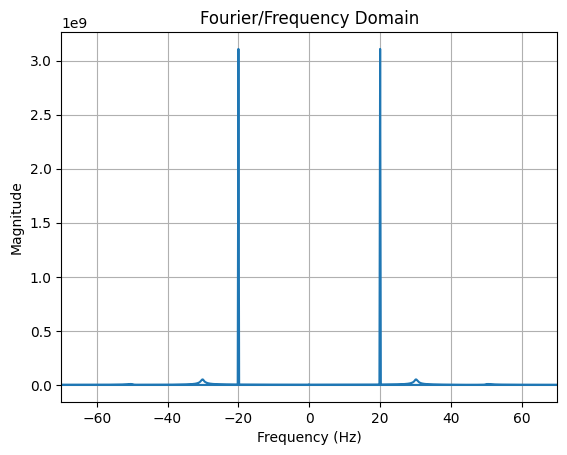

In [23]:
normalized_reconstructed = normalize_samples(reconstructed_sine)
yf_reconstructed, xf_reconstructed = get_fft_transform(normalized_reconstructed, sample_rate_for_example, duration_for_example)
plot_audio_in_frequency(xf_reconstructed, yf_reconstructed,[-70,70])

# Save Toy Sine

In [24]:
sad_frequency = 460 # tis frequency really sound sad 
samplerate_write = 44100
duration = 10

_, sad_sine = generate_sine_wave(sad_frequency, samplerate_write, 10)
normalized_sad_sine = normalize_samples(samples=sad_sine, use_abs=True)

sad_sine_path = Path('toy_example.ipynb').resolve().parents[1] / 'audio-files' / 'results' / 'sad_sine.wav'

write_audio(sad_sine_path, normalized_sad_sine, samplerate_write)